In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os # 因為要建立資料夾
from tensorflow.keras.models import Sequential # CNN 建立空模函式
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D # CNN 函式
from tensorflow.python.keras.utils import np_utils # 層

In [2]:
# 掛載雲端硬碟
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 訓練資料

In [3]:
import os
path = '/content/drive/MyDrive/聯成電腦/project/photos/train'
files = os.listdir(path)
directories = list()

In [4]:
for dir in files:
  if os.path.isdir(os.path.join(path, dir)):
    directories.append(dir)
directories

['苦瓜', '西瓜', '南瓜', '冬瓜', '木瓜', '哈密瓜', '小黃瓜', '絲瓜', '櫛瓜', '瓠瓜']

In [5]:
def resizeFile(dir_path, img_files): # dir_path 某個水果資料夾 img_files 資料夾中的所有檔案
  size = (250, 250)
  for item in img_files:

    item = os.path.join(dir_path, item)

    images = cv2.imread(item)
    # :2 兩通道
    h, w = images.shape[:2]
    # 找最大邊
    if h > size[0] or w > size[1]:
      # 找出最大比例 => 等比例縮小
      ratio = max(h/size[0], w/size[1])
      images = cv2.resize(images, (int(w/ratio), int(h/ratio)))
      # 重新抓取新的寬、高
    h, w = images.shape[:2]
    # 高度的黑邊
    pad_h = size[0]-h
    # 寬度的黑邊
    pad_w = size[1]-w
    # 上、下補黑邊的高度
    top, bottom = pad_h//2, pad_h-(pad_h//2)
    # 左、右補黑邊的寬度
    left, right = pad_w//2, pad_w-(pad_w//2)
    # 補黑邊(填充：適用於圖片縮小時)
    images = cv2.copyMakeBorder(images, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0,0,0])
    # 抓檔名
    name = item.split('/')[-1]
    # 用程式判斷是否有所需的資料夾

    cv2.imwrite(f"{dir_path}/resize/{name}", images)

In [6]:
x_train = list()
y_train = list()

def create_data(path, category):
  for p in os.listdir(path):
    # 轉灰階
    img_array = cv2.imread(os.path.join(path, p), 0)
    # 訓練題目
    x_train.append(img_array)
    # 訓練答案
    y_train.append(category)

In [7]:
category = 0
categoryD = {}
for directory in directories:
  dir_path = os.path.join(path, directory)
  # 目錄中的所有檔案
  dir_file = os.listdir(dir_path)
  img_files = list()
  for file in dir_file:
    # 如附檔名為這三種的任何一種
    if file.endswith('.jpg') or file.endswith('.png') or file.endswith('.jpeg'):
      img_files.append(file)
  resizeDir = os.path.join(dir_path, 'resize')
  if not os.path.exists(resizeDir):
    os.makedirs(resizeDir)
    resizeFile(dir_path, img_files)
  # 分類
  create_data(resizeDir, category)
  categoryD[category]=directory
  category += 1


In [8]:
categoryD

{0: '苦瓜',
 1: '西瓜',
 2: '南瓜',
 3: '冬瓜',
 4: '木瓜',
 5: '哈密瓜',
 6: '小黃瓜',
 7: '絲瓜',
 8: '櫛瓜',
 9: '瓠瓜'}

In [9]:
len(x_train)

1475

In [10]:
len(y_train)

1475

array([[246, 255, 253, ..., 252, 251, 251],
       [246, 255, 253, ..., 252, 251, 251],
       [246, 255, 253, ..., 252, 251, 251],
       ...,
       [247, 255, 253, ..., 255, 255, 255],
       [247, 255, 254, ..., 255, 255, 255],
       [247, 255, 254, ..., 255, 255, 255]], dtype=uint8)
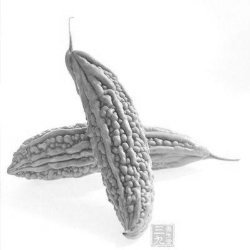

In [11]:
x_train[0]

# 測試資料

In [12]:
import os
test_path = '/content/drive/MyDrive/聯成電腦/project/photos/test'
test_files = os.listdir(test_path)
test_directories = list()

In [13]:
for dir in test_files:
  if os.path.isdir(os.path.join(test_path, dir)):
    test_directories.append(dir)
test_directories

['小黃瓜', '苦瓜', '木瓜', '南瓜', '冬瓜', '西瓜', '哈密瓜', '瓠瓜', '絲瓜', '櫛瓜']

In [14]:
x_test = list()
y_test = list()

def create_testdata(path, category):
  for p in os.listdir(path):
    # 轉灰階
    img_array = cv2.imread(os.path.join(path, p), 0)
    # 訓練題目
    x_test.append(img_array)
    # 訓練答案
    y_test.append(category)

In [15]:
test_categoryD = {}
for directory in test_directories:
  dir_path = os.path.join(test_path, directory)
  # 目錄中的所有檔案
  dir_file = os.listdir(dir_path)
  img_files = list()
  for file in dir_file:
    # 如附檔名為這三種的任何一種
    if file.endswith('.jpg') or file.endswith('.png') or file.endswith('.jpeg'):
      img_files.append(file)
  resizeDir = os.path.join(dir_path, 'resize')
  if not os.path.exists(resizeDir):
    os.makedirs(resizeDir)
    resizeFile(dir_path, img_files)

  for categoryN, values in categoryD.items():
    if values == directory:
      test_categoryD[categoryN] = directory
      # 分類
      create_testdata(resizeDir, categoryN)
test_categoryD

{6: '小黃瓜',
 0: '苦瓜',
 4: '木瓜',
 2: '南瓜',
 3: '冬瓜',
 1: '西瓜',
 5: '哈密瓜',
 9: '瓠瓜',
 7: '絲瓜',
 8: '櫛瓜'}

# 打散成組的資料

In [16]:
x_train = np.array(x_train).reshape(-1,250,250,1) # (張數, 長, 寬, 通道數)
y_train = np.array(y_train)

x_train = x_train / 255 # 色階 => 收斂
# 將答案分類 OneHot
y_train = np_utils.to_categorical(y_train)

x_test = np.array(x_test).reshape(-1,250,250,1)
y_test = np.array(y_test)

x_test = x_test / 255
y_test = np_utils.to_categorical(y_test)

# 打亂資料群

In [39]:
from sklearn.model_selection import train_test_split
# 訓練
rX_train, rX_test, ry_train, ry_test = train_test_split(x_train, y_train, test_size=1, random_state=1)
# 測試
raX_train, raX_test, ray_train, ray_test = train_test_split(x_test, y_test, test_size=1, random_state=1)

# 建模

In [40]:
model = Sequential()

In [41]:
# 卷積
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
# 池化
model.add(MaxPooling2D(pool_size=(2,2))) # pool_size=(2,2) 為預設，不寫也可以
# 卷積
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
# 池化
model.add(MaxPooling2D(pool_size=(2,2)))
# 卷積
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
# 池化
model.add(MaxPooling2D(pool_size=(2,2)))
# 放棄的比率
#model.add(Dropout(0.3))
# 扁平化
model.add(Flatten())
# 放棄的比率
model.add(Dropout(0.3))
# 連接層：通常用1024(三通道 32*32*32)
model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.3))
# 連接層：通常用1024(三通道 32*32*32)
model.add(Dense(1024, activation='relu'))

# 輸出層：10種分類
model.add(Dense(10, activation='softmax'))

# 編譯(程式)

In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
x_train.shape

(1475, 250, 250, 1)

# 訓練

In [44]:
train_history = model.fit(rX_train, ry_train, epochs=15, batch_size=64, validation_data=(raX_train, ray_train))

Epoch 1/15
18/18 [==============================] - 4s 107ms/step - loss: 2.8690 - accuracy: 0.1184 - val_loss: 2.3052 - val_accuracy: 0.1102
Epoch 2/15
18/18 [==============================] - 1s 51ms/step - loss: 2.2118 - accuracy: 0.1781 - val_loss: 2.1320 - val_accuracy: 0.2047
Epoch 3/15
18/18 [==============================] - 1s 50ms/step - loss: 2.0817 - accuracy: 0.2215 - val_loss: 2.0529 - val_accuracy: 0.2323
Epoch 4/15
18/18 [==============================] - 1s 51ms/step - loss: 1.9317 - accuracy: 0.2911 - val_loss: 2.0096 - val_accuracy: 0.2717
Epoch 5/15
18/18 [==============================] - 1s 51ms/step - loss: 1.8013 - accuracy: 0.3544 - val_loss: 1.9952 - val_accuracy: 0.3189
Epoch 6/15
18/18 [==============================] - 1s 51ms/step - loss: 1.5491 - accuracy: 0.4684 - val_loss: 1.7830 - val_accuracy: 0.4173
Epoch 7/15
18/18 [==============================] - 1s 51ms/step - loss: 1.1524 - accuracy: 0.6103 - val_loss: 1.6586 - val_accuracy: 0.4724
Epoch 8/15
1

In [45]:
def showHistory(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.xlabel('Epoch')
  plt.ylabel(train)
  plt.legend(['train', 'validation'], loc=0)
  plt.show()

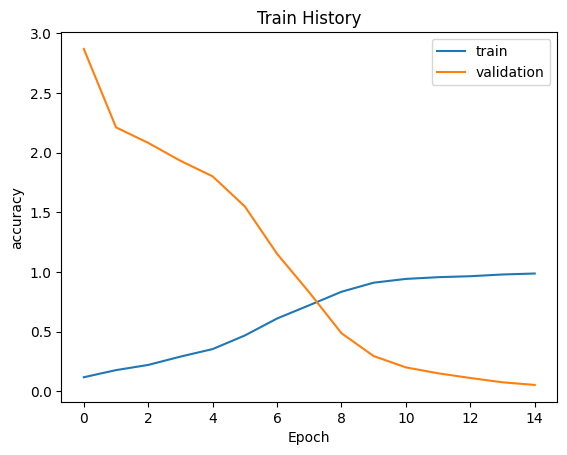

In [46]:
showHistory(train_history, 'accuracy', 'loss')

# 測試

In [47]:
predict1 = model.predict(x_train)

47/47 [==============================] - 0s 8ms/step


In [48]:
predict2 = model.predict(x_test)

11/11 [==============================] - 0s 7ms/step


In [49]:
right = 0
for i in range(len(predict1)):
  ans = np.argmax(predict1[i])
  pre = y_train[i][ans]
  if pre == 1:
    right += 1
right / len(predict1)

0.8169491525423729

In [50]:
right = 0
for i in range(len(predict2)):
  ans = np.argmax(predict2[i])
  pre = y_test[i][ans]
  if pre == 1:
    right += 1
right / len(predict2)

0.6283185840707964